## data analysis

In [45]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

In [46]:
pr_rd1_d0 = pd.read_csv('data/round1/prices_round_1_day_0.csv', delimiter=';')
pr_rd1_d0.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
4,0,100,KELP,2030,4,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0


In [47]:
rainfr = pr_rd1_d0[pr_rd1_d0['product'] == 'RAINFOREST_RESIN']
kelp = pr_rd1_d0[pr_rd1_d0['product'] == 'KELP']
squid = pr_rd1_d0[pr_rd1_d0['product'] == 'SQUID_INK']

pr_rd1_d0 = pr_rd1_d0.drop(columns = ['bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3'])

print(rainfr.head())
print(kelp.head())
print(squid.head())

    day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0     0          0  RAINFOREST_RESIN         9998             1       9995.0   
5     0        100  RAINFOREST_RESIN         9996             1       9995.0   
7     0        200  RAINFOREST_RESIN         9996             1       9995.0   
11    0        300  RAINFOREST_RESIN         9996             2       9995.0   
12    0        400  RAINFOREST_RESIN         9998             5       9996.0   

    bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           30.0          NaN           NaN        10005            30   
5           30.0          NaN           NaN        10002             6   
7           21.0          NaN           NaN        10004             1   
11          23.0          NaN           NaN         9998             3   
12           2.0       9995.0          23.0        10004             2   

    ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0  

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

   timestamp            symbol   currency    price  quantity
0        100  RAINFOREST_RESIN  SEASHELLS  10002.0         1
2        300  RAINFOREST_RESIN  SEASHELLS   9998.0         2
3        300  RAINFOREST_RESIN  SEASHELLS   9998.0         1
6        500  RAINFOREST_RESIN  SEASHELLS  10004.0         1
7        500  RAINFOREST_RESIN  SEASHELLS  10002.0         1


Sample Statistics For Rainforest Resin Successful Trade Prices
           timestamp         price     quantity
count    2407.000000   2407.000000  2407.000000
mean   489623.764022   9999.970503     2.039468
std    289402.262534      3.131033     1.924732
min       100.000000   9995.000000     0.000000
25%    238500.000000   9998.000000     1.000000
50%    485200.000000   9998.000000     1.000000
75%    736700.000000  10002.000000     2.000000
max    999500.000000  10005.000000    12.000000


Close Price Statistics
      timestamp            symbol   currency    price  quantity
8161     997600  RAINFOREST_RESIN  SEASHELLS  10

Text(0, 0.5, 'Price')

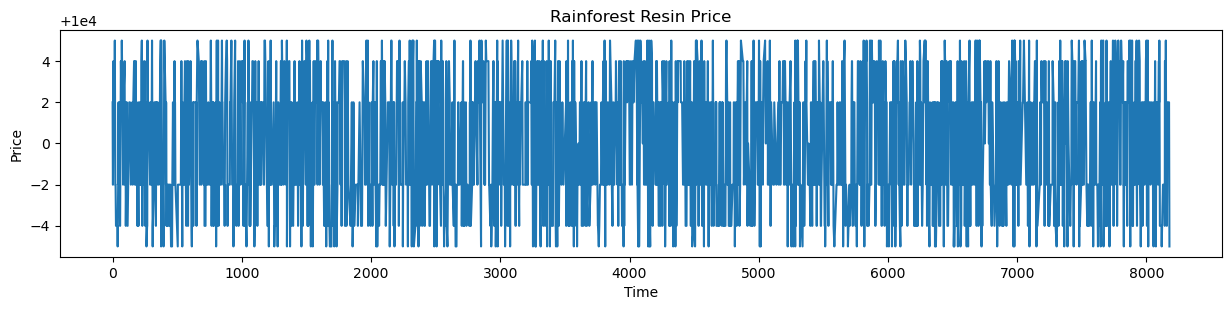

In [49]:
rfresinTrades = pd.read_csv('data/round1/trades_round_1_day_0.csv', delimiter=';')
rfresinTrades = rfresinTrades[rfresinTrades['symbol'] == 'RAINFOREST_RESIN']
rfresinTrades = rfresinTrades.drop(columns = ['buyer', 'seller'])
print(rfresinTrades.head())
print("\n")
print("Sample Statistics For Rainforest Resin Successful Trade Prices")
print(rfresinTrades.describe())

print("\n")
print("Close Price Statistics")
print(rfresinTrades.tail())


## Graphing the data
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(rfresinTrades['price'], label='Price')
plt.title('Rainforest Resin Price')
plt.xlabel('Time')
plt.ylabel('Price')


In [ ]:
def mean_reversion_strategy(prices, volumes, window=50, threshold=1.0):
    position = 0  # 0 for no position, 1 for long, -1 for short
    entry_price = None
    trades = []

    for i in range(window, len(prices)):
        current_price = prices.iloc[i]
        current_volume = volumes.iloc[i]
        current_time = i

        prices_window = prices.iloc[i-window:i]
        volumes_window = volumes.iloc[i-window:i]
        # Calculate volume-weighted average price
        vwap = (prices_window * volumes_window).sum() / volumes_window.sum()
        weighted_std = np.sqrt(((volumes_window * (prices_window - vwap) ** 2).sum()) / volumes_window.sum())

        if position == 0:
            if current_price < vwap - threshold * weighted_std:
                position = 1
                entry_price = current_price
                trades.append({'timestamp': current_time, 'action': 'buy',
                               'price': current_price, 'quantity': current_volume})
            elif current_price > vwap + threshold * weighted_std:
                position = -1
                entry_price = current_price
                trades.append({'timestamp': current_time, 'action': 'sell',
                               'price': current_price, 'quantity': current_volume})
        elif position == 1:
            if current_price >= vwap:
                trades.append({'timestamp': current_time, 'action': 'sell',
                               'price': current_price, 'quantity': current_volume})
                position = 0
        elif position == -1:
            if current_price <= vwap:
                trades.append({'timestamp': current_time, 'action': 'buy',
                               'price': current_price, 'quantity': current_volume})
                position = 0

    return trades


In [51]:
price_series = rfresinTrades['price']
volume_series = rfresinTrades['quantity']
trades = mean_reversion_strategy(price_series, volume_series ,window=50, threshold=1.0)

In [52]:
def compute_performance(trade_list):
    pnl = 0.0
    trade_details = []
    for i in range(0, len(trade_list) - 1, 2):
        entry = trade_list[i]
        exit = trade_list[i+1]
        qty = entry.get('quantity', 1)  # use recorded volume; default to 1 if missing
        if entry['action'] == 'buy' and exit['action'] == 'sell':
            profit = (exit['price'] - entry['price']) * qty
            trade_type = 'long'
        elif entry['action'] == 'sell' and exit['action'] == 'buy':
            profit = (entry['price'] - exit['price']) * qty
            trade_type = 'short'
        else:
            profit = 0.0
            trade_type = 'undefined'
        pnl += profit
        trade_details.append({
            'entry_time': entry['timestamp'],
            'exit_time': exit['timestamp'],
            'trade_type': trade_type,
            'entry_price': entry['price'],
            'exit_price': exit['price'],
            'quantity': qty,
            'profit': profit
        })
    return pnl, trade_details


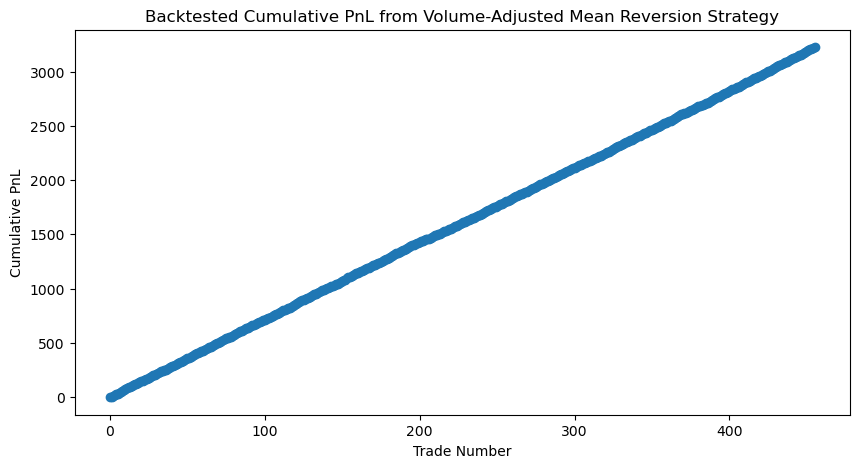

In [53]:
cumulative_pnl = [0]
for trade in trade_details:
    cumulative_pnl.append(cumulative_pnl[-1] + trade['profit'])

plt.figure(figsize=(10, 5))
plt.plot(range(len(cumulative_pnl)), cumulative_pnl, marker='o', linestyle='-')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative PnL')
plt.title('Backtested Cumulative PnL from Volume-Adjusted Mean Reversion Strategy')
plt.show()

In [54]:
import time

Signal: SELL (short) at price 10004.00
Signal: BUY (cover short) at price 9996.00 | Trade PnL: 8.00
Signal: BUY at price 9996.00
Signal: SELL (exit long) at price 10005.00 | Trade PnL: 9.00
Signal: BUY at price 9996.00
Signal: SELL (exit long) at price 10002.00 | Trade PnL: 6.00
Signal: BUY at price 9996.00
Signal: SELL (exit long) at price 10004.00 | Trade PnL: 8.00
Signal: SELL (short) at price 10004.00
Signal: BUY (cover short) at price 9996.00 | Trade PnL: 8.00
Signal: BUY at price 9996.00
Signal: SELL (exit long) at price 10002.00 | Trade PnL: 6.00
Signal: SELL (short) at price 10004.00
Signal: BUY (cover short) at price 9998.00 | Trade PnL: 6.00
Signal: SELL (short) at price 10005.00
Signal: BUY (cover short) at price 9998.00 | Trade PnL: 7.00
Signal: SELL (short) at price 10004.00
Signal: BUY (cover short) at price 9998.00 | Trade PnL: 6.00
Signal: SELL (short) at price 10004.00
Signal: BUY (cover short) at price 9995.00 | Trade PnL: 9.00
Signal: BUY at price 9996.00
Signal: SEL

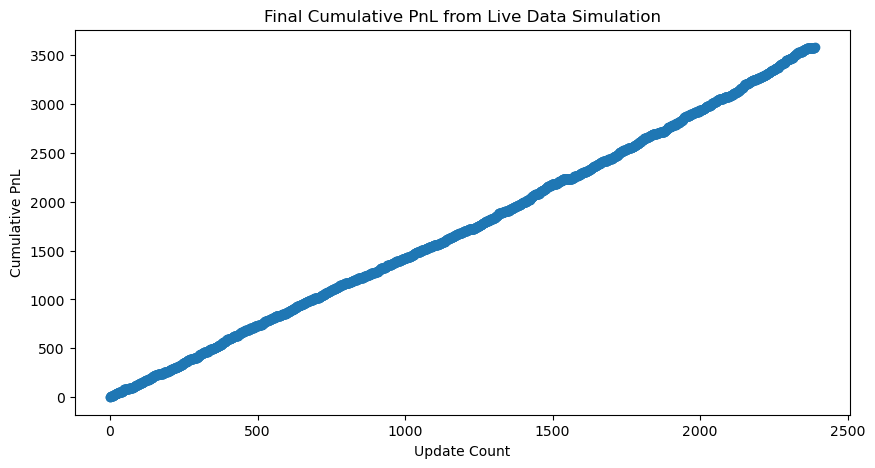

In [55]:
def live_data_simulation_noninteractive(initial_prices, new_price_stream, window=50, threshold=1.0):
    """
    Simulates a live data feed for a mean reversion strategy without interactive plot updates.
    Computes and returns the cumulative PnL over the simulation.
    
    Parameters:
      initial_prices (pd.Series): Historical prices to initialise the rolling window.
      new_price_stream (iterable): Stream of new prices (e.g. from a live feed).
      window (int): Size of the rolling window for computing mean and standard deviation.
      threshold (float): Number of standard deviations away from the mean to trigger a signal.
    
    Returns:
      cumulative_pnl (list): List of cumulative PnL values after each new data point.
      update_count (int): Total number of updates processed.
    """
    # Initialize a recent price window and simulation variables
    recent_prices = list(initial_prices[-window:])
    position = 0  # 0: flat, 1: long, -1: short
    entry_price = None
    cumulative_pnl = [0]  # Starting PnL is 0
    update_count = 0  # Counter for the number of live updates

    # Process the live price stream
    for new_price in new_price_stream:
        update_count += 1
        recent_series = pd.Series(recent_prices)
        rolling_mean = recent_series.mean()
        rolling_std = recent_series.std()
        
        trade_executed = False
        trade_profit = 0.0
        
        # Signal Generation & Execution
        if position == 0:
            # Enter a long position if price is significantly below the mean
            if new_price < rolling_mean - threshold * rolling_std:
                position = 1
                entry_price = new_price
                print(f"Signal: BUY at price {new_price:.2f}")
            # Optionally enter a short position if price is significantly above the mean
            elif new_price > rolling_mean + threshold * rolling_std:
                position = -1
                entry_price = new_price
                print(f"Signal: SELL (short) at price {new_price:.2f}")
        elif position == 1:
            # Exit long when price reverts to or exceeds the mean
            if new_price >= rolling_mean:
                trade_profit = new_price - entry_price
                cumulative_pnl.append(cumulative_pnl[-1] + trade_profit)
                print(f"Signal: SELL (exit long) at price {new_price:.2f} | Trade PnL: {trade_profit:.2f}")
                position = 0
                trade_executed = True
        elif position == -1:
            # Exit short when price reverts downward toward the mean
            if new_price <= rolling_mean:
                trade_profit = entry_price - new_price
                cumulative_pnl.append(cumulative_pnl[-1] + trade_profit)
                print(f"Signal: BUY (cover short) at price {new_price:.2f} | Trade PnL: {trade_profit:.2f}")
                position = 0
                trade_executed = True
        
        # If no trade was executed, carry forward the previous cumulative PnL.
        if not trade_executed:
            cumulative_pnl.append(cumulative_pnl[-1])
        
        # Update the rolling window with the new price
        recent_prices.append(new_price)
        if len(recent_prices) > window:
            recent_prices.pop(0)
            
        # Optional: Uncomment the next line to simulate a delay for each live update.
        # time.sleep(0.5)
    
    return cumulative_pnl, update_count

# ----------------------------
# Simulated Live Stream and Execution
# ----------------------------
rfresinTradesDayNeg1 = pd.read_csv('data/round1/trades_round_1_day_-1.csv', delimiter=';')
rfresinTradesDayNeg1 = rfresinTradesDayNeg1[rfresinTradesDayNeg1['symbol'] == 'RAINFOREST_RESIN']
rfresinTradesDayNeg1 = rfresinTradesDayNeg1.drop(columns = ['buyer', 'seller'])

live_price_stream = rfresinTradesDayNeg1['price'].values

# Run the live simulation (non-interactive)
cumulative_pnl, update_count = live_data_simulation_noninteractive(rfresinTrades['price'], 
                                                                    live_price_stream, 
                                                                    window=50, 
                                                                    threshold=1.0)

# ----------------------------
plt.figure(figsize=(10, 5))
# x-axis: each update; y-axis: cumulative PnL
plt.plot(range(update_count + 1), cumulative_pnl, marker='o', linestyle='-')
plt.xlabel('Update Count')
plt.ylabel('Cumulative PnL')
plt.title('Final Cumulative PnL from Live Data Simulation')
plt.show()


